In [1]:
from helpers.metrics import Metrics

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import json
import numpy as np

# Load the data
X_val = np.load('./data_split/X_val.npy')
Y_val = np.load('./data_split/Y_val.npy')

# Load the model
model = tf.keras.models.load_model('./model/model.h5')

# Get predictions
Y_pred = model.predict(X_val)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true_classes = np.argmax(Y_val, axis=1)

# Confusion Matrix
cm = confusion_matrix(Y_true_classes, Y_pred_classes)

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step


In [34]:
print('Confusion Matrix')
print(cm)

Confusion Matrix
[[599   1   2   0   3   0   2   4   6   7]
 [  0 642   3   0   2   0   0   7   0   0]
 [  0   1 537   9   0   0   0  21   3   1]
 [  0   0   3 582   0   0   0   3   1   0]
 [  0   0   0   0 573   0   2   1   3   1]
 [  1   1   0  12   1 515   4   4   5   8]
 [  5   1   1   0   4   1 563   0   5   0]
 [  0   1   9   1   2   0   0 620   0   0]
 [  0   0   5   1   4   2   2   0 571   0]
 [  3   0   0   0  19   1   0  12   7 590]]


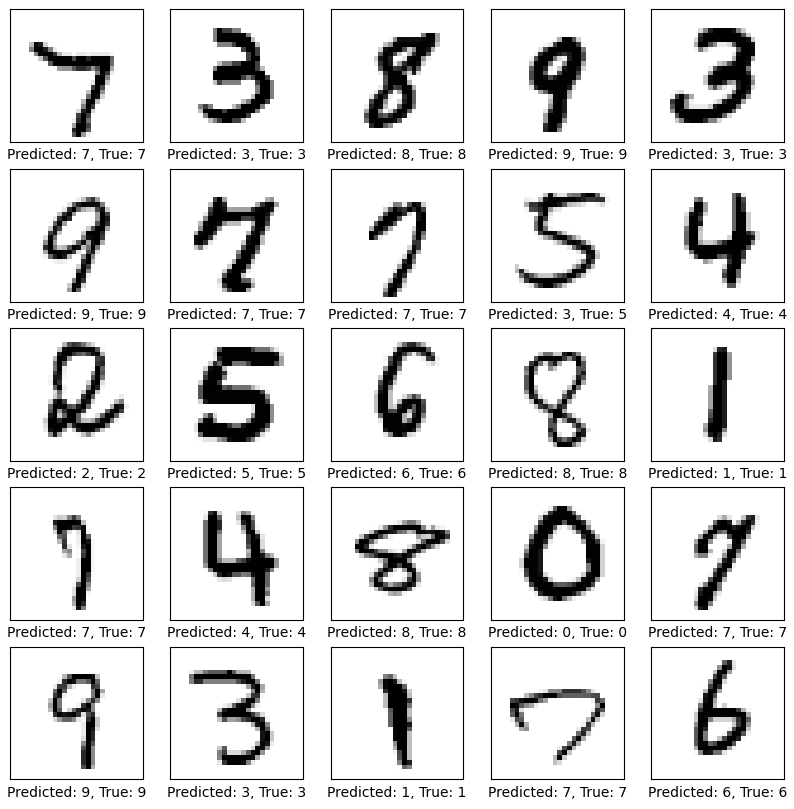

In [36]:
# plot some images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_val[i], cmap=plt.cm.binary)
    plt.xlabel(f'Predicted: {Y_pred_classes[i]}, True: {Y_true_classes[i]}')
plt.show()



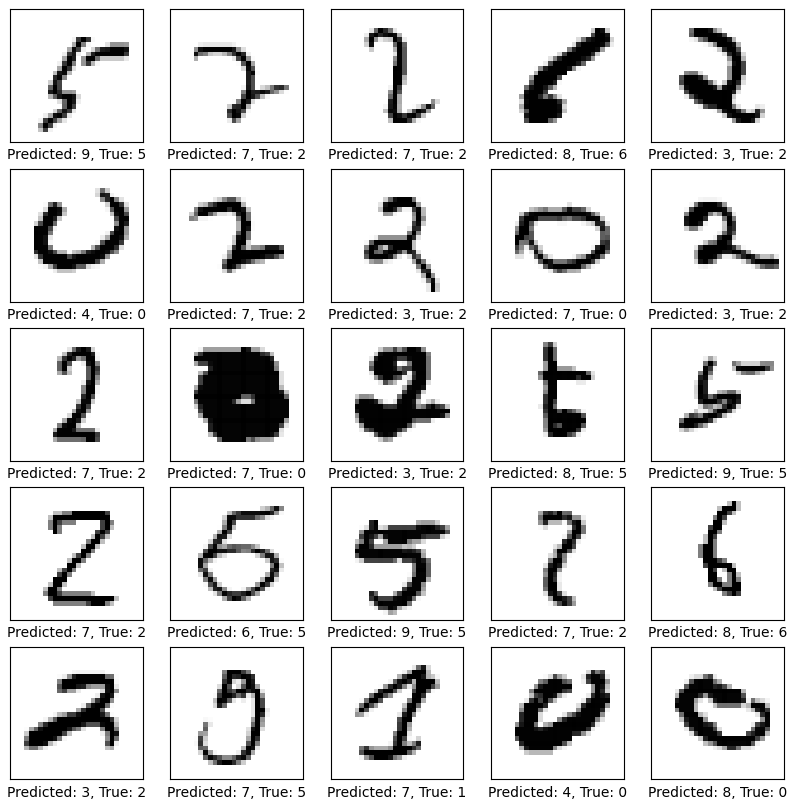

In [44]:
# plot some false positives and false negatives
false_positives = []
false_negatives = []
for i in range(len(Y_true_classes)):
    if Y_true_classes[i] != Y_pred_classes[i]:
        if Y_true_classes[i] < Y_pred_classes[i]:
            false_positives.append(i)
        else:
            false_negatives.append(i)
            
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_val[false_positives[i]], cmap=plt.cm.binary)
    plt.xlabel(f'Predicted: {Y_pred_classes[false_positives[i]]}, True: {Y_true_classes[false_positives[i]]}')
plt.show()
